# Sales Forecasting on Walmart dataset

Now let us look start the project with our objective, 

#### Objective: To develop an accurate sales forecasting model that predicts the future sales volume based on historical data and  market trends.


In [88]:
import pandas as pd 
import numpy as np

In [89]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [90]:
df.shape

(6435, 8)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [92]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [93]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [94]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [95]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [96]:
df.duplicated().sum()

0

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

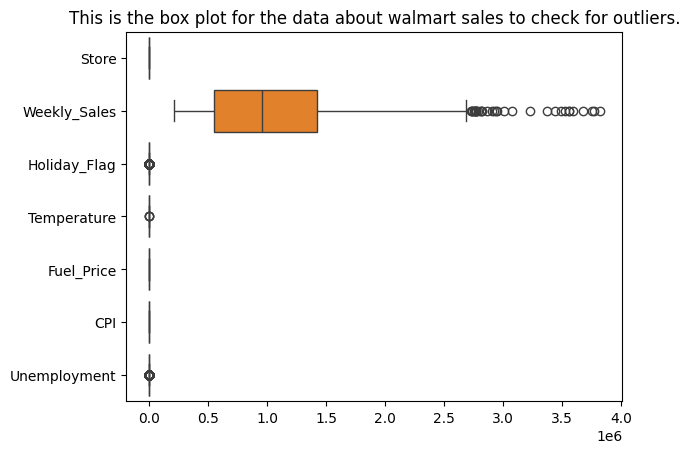

In [98]:
sns.boxplot(data=df, orient='h')
plt.title("This is the box plot for the data about walmart sales to check for outliers.")
plt.show()

In [99]:
num_features = df.select_dtypes(include='number').columns
cat_features = df.select_dtypes(include='object').columns

In [100]:
num_features

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [101]:
cat_features

Index(['Date'], dtype='object')

## Univariate Analysis

Histplot for the numerical features

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

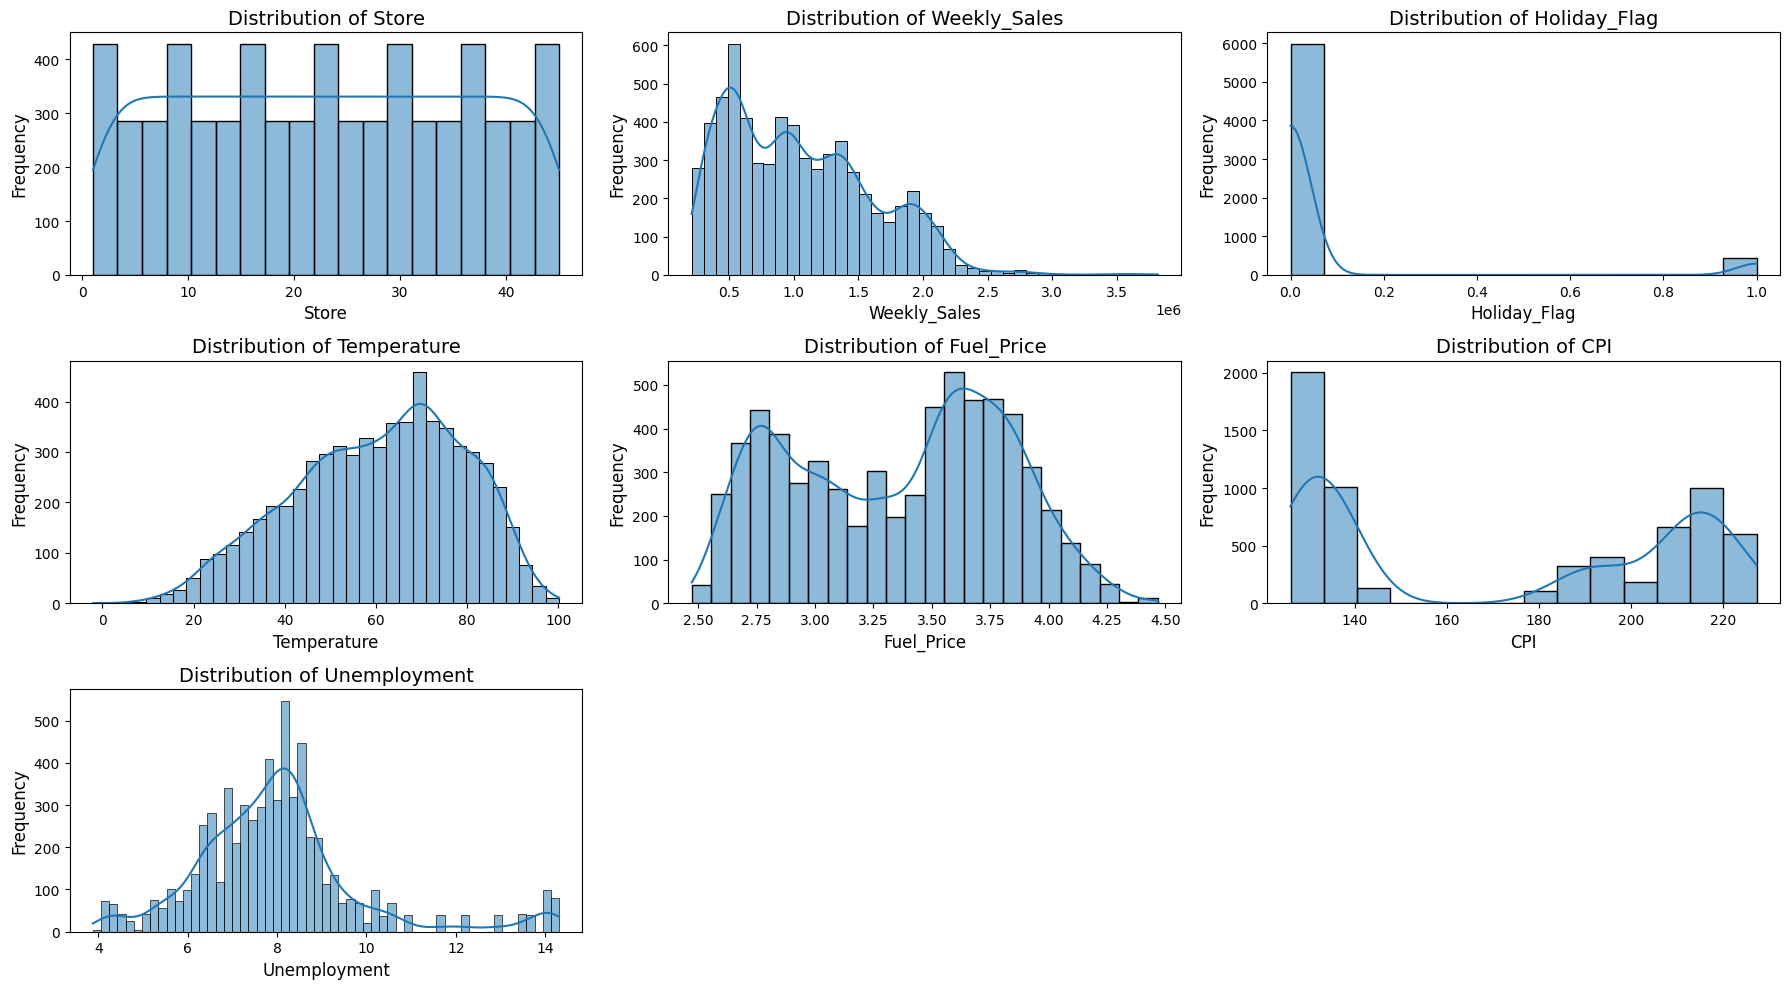

In [103]:
# Set up the figure and axes for the subplots
# This will create a 2x3 grid of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical features and plot a histogram for each
for i, feature in enumerate(num_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    
# Hide any unused subplots
for j in range(len(num_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We draw bar plots for categorical features. But the categorical feature in this dataset is date, which is actually belongs to datetime datatype.

## Bivariate Analysis

Scatter Plot - Numerical vs Numerical

Box Plot - Numerical vs Categorical

Heatmap - Categorical vs Categorical

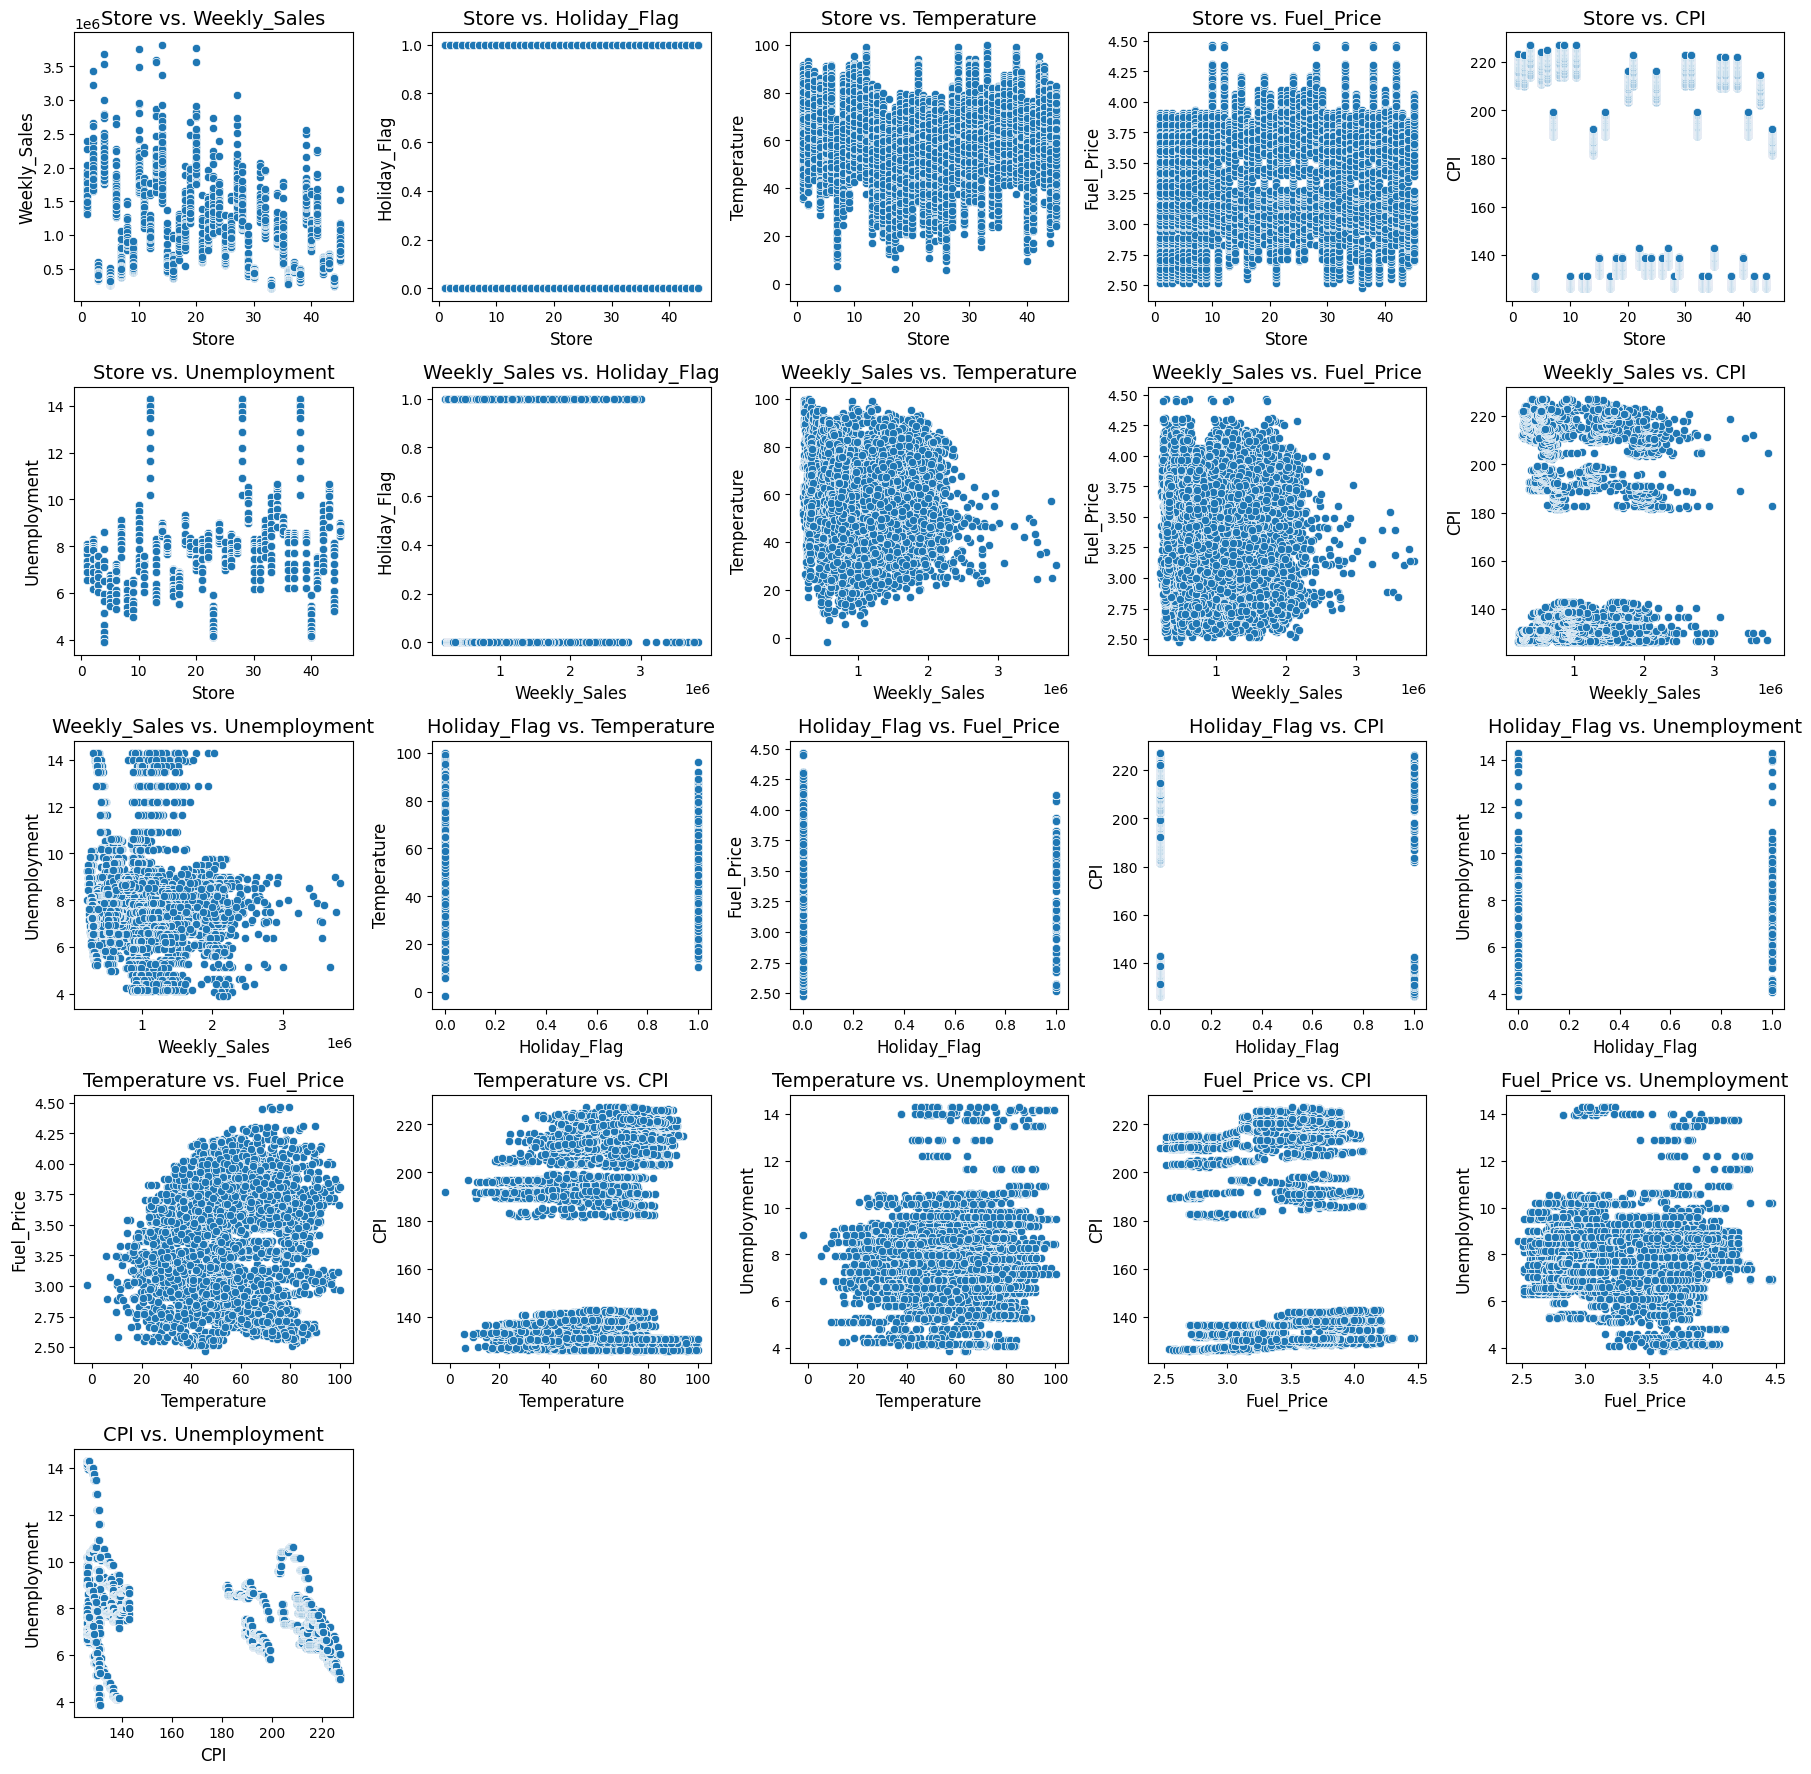

In [104]:
# Calculate the number of subplots needed
num_features_len = len(num_features)
total_plots = num_features_len * (num_features_len - 1) // 2

# Set up the figure and axes for the subplots
# This will arrange the plots in a grid
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18, 18))
axes = axes.flatten()
plot_idx = 0

# Loop through all unique pairs of numerical features
for i in range(num_features_len):
    for j in range(i + 1, num_features_len):
        feature1 = num_features[i]
        feature2 = num_features[j]
        
        # Create a scatter plot for the current pair of features
        sns.scatterplot(data=df, x=feature1, y=feature2, ax=axes[plot_idx])
        
        # Set titles and labels
        axes[plot_idx].set_title(f'{feature1} vs. {feature2}', fontsize=14)
        axes[plot_idx].set_xlabel(feature1, fontsize=12)
        axes[plot_idx].set_ylabel(feature2, fontsize=12)
        
        plot_idx += 1

# Hide any unused subplots
for k in range(plot_idx, len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

## Multivariate Analysis
Heatmap

Pairplot

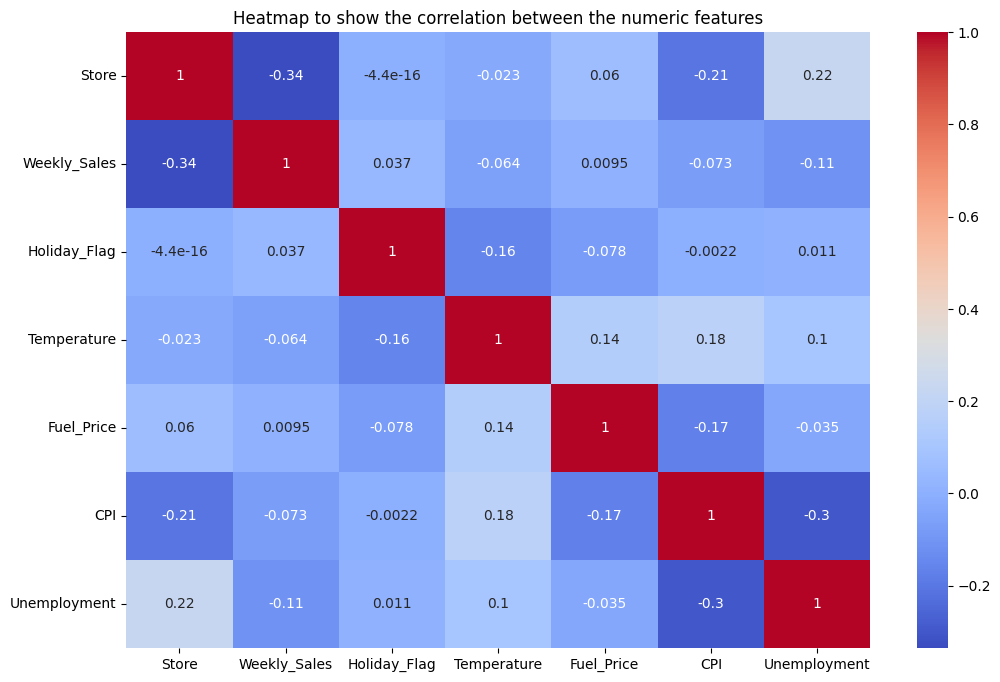

In [105]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap = 'coolwarm')
plt.title("Heatmap to show the correlation between the numeric features")
plt.show()

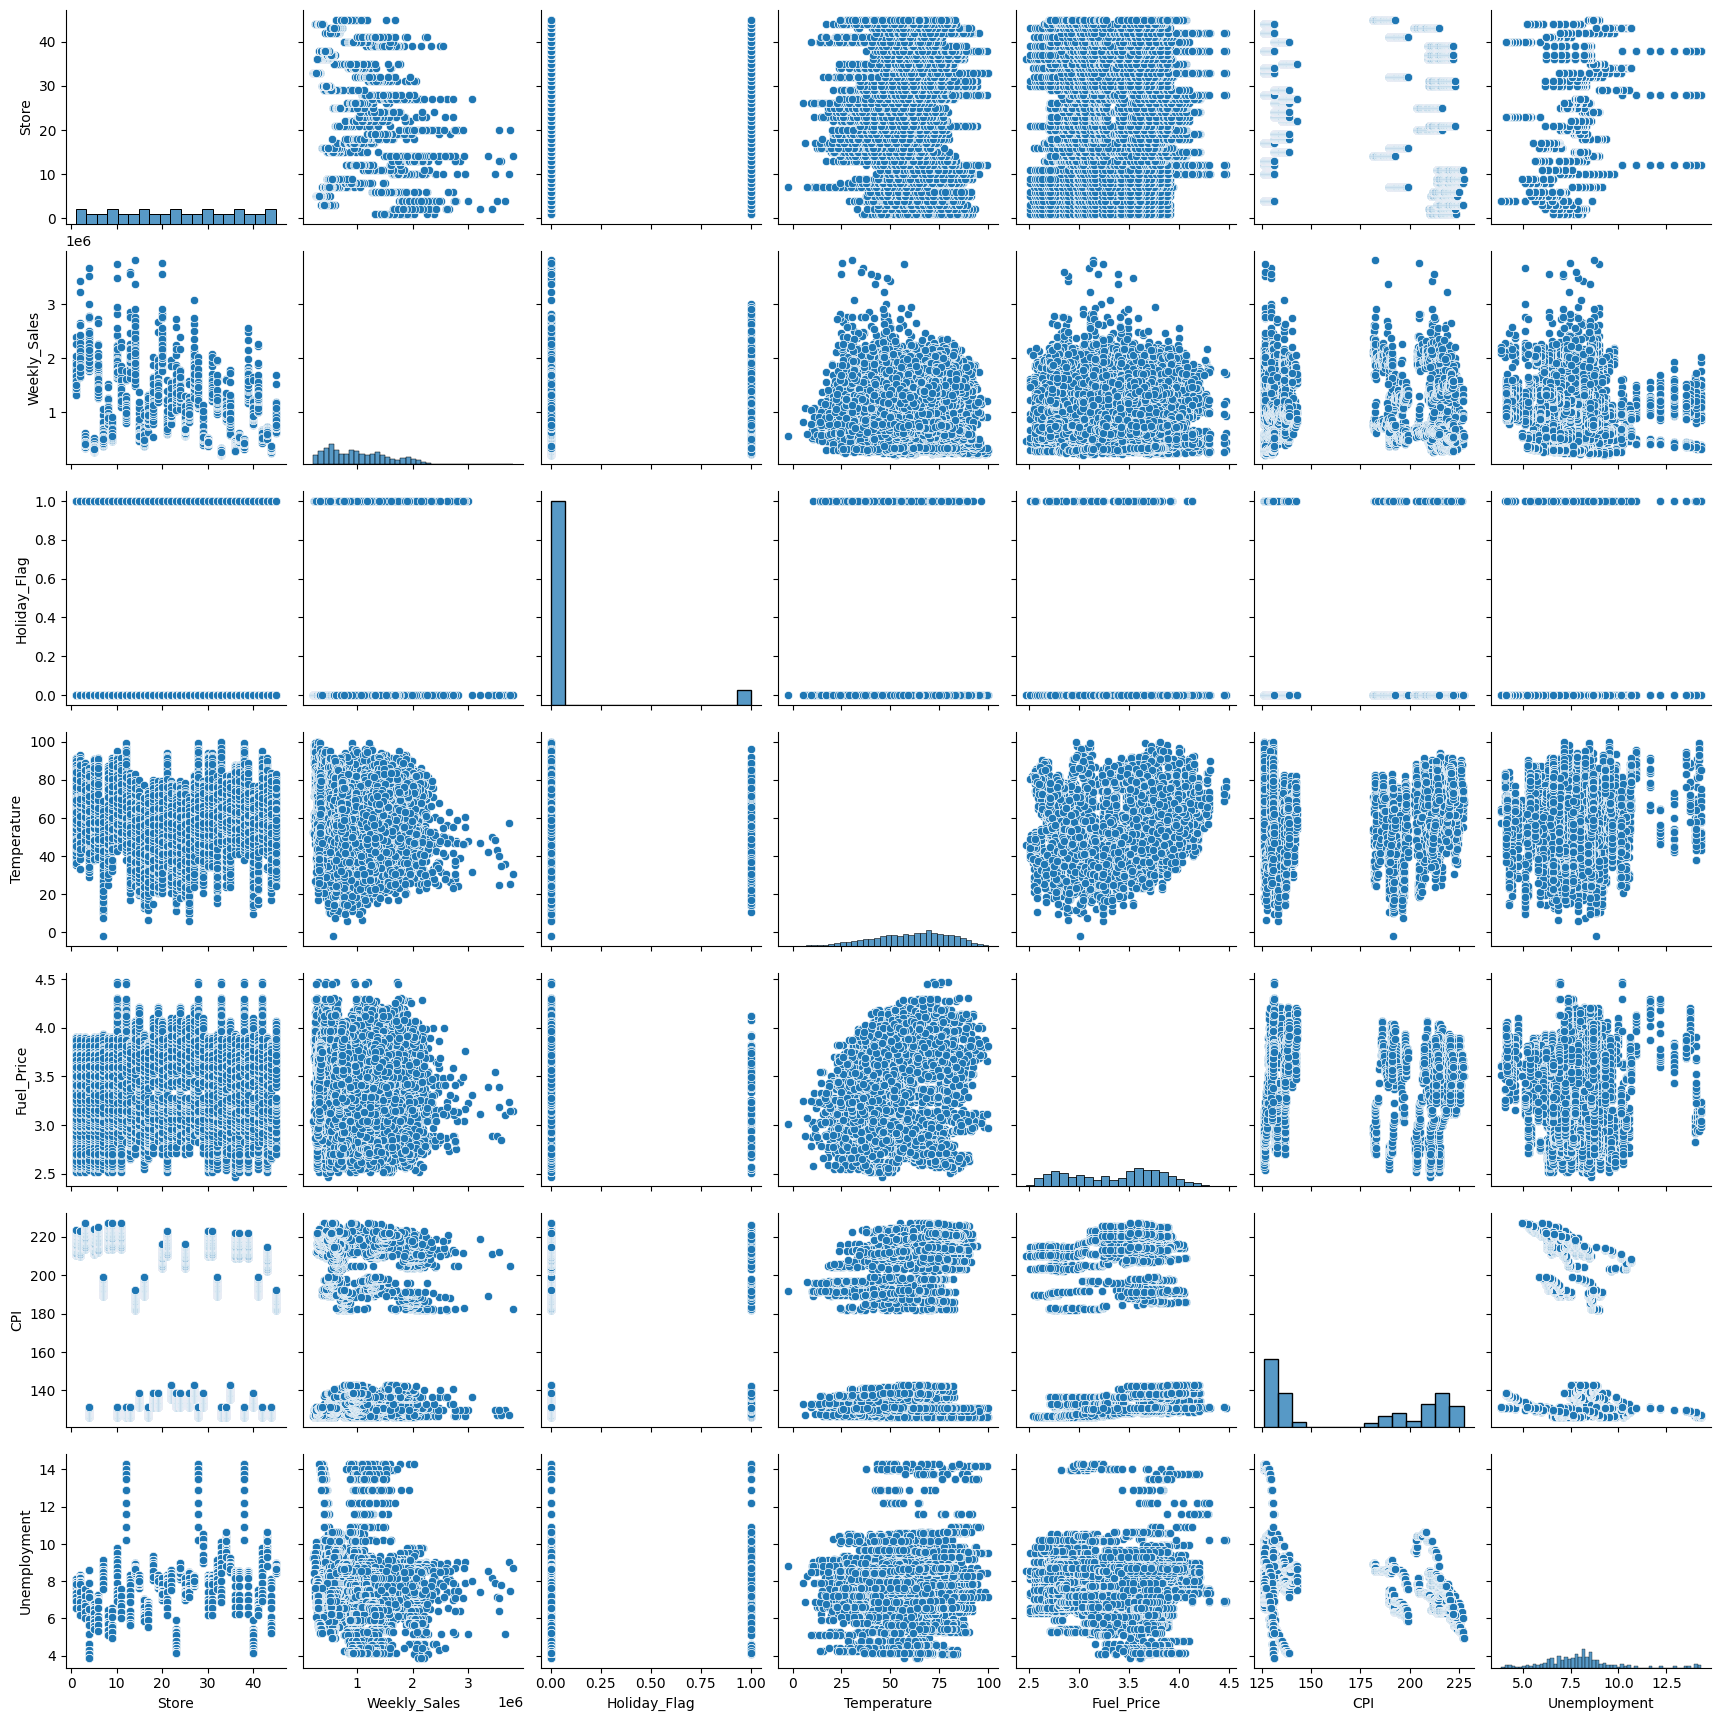

In [106]:
sns.pairplot(df)
plt.show()

In [107]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [108]:
df.duplicated().sum()

0

In [109]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [111]:
# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day_of_Week'] = df['Date'].dt.dayofweek


In [112]:
# Choose a split point based on a date.
# A common practice is to use a fixed date, for example, the start of 2012.
split_date = '2012-01-01'

# Split the data into a training set and a testing set
train_df = df[df['Date'] < split_date].copy()
test_df = df[df['Date'] >= split_date].copy()

# Print the shape of the resulting dataframes to confirm the split
print(f"Shape of the entire dataset: {df.shape}")
print(f"Shape of the training set: {train_df.shape}")
print(f"Shape of the testing set: {test_df.shape}")

# Optional: You can now drop the 'Date' column from both sets
train_df = train_df.drop('Date', axis=1)
test_df = test_df.drop('Date', axis=1)

Shape of the entire dataset: (6435, 12)
Shape of the training set: (4500, 12)
Shape of the testing set: (1935, 12)


In [113]:
df.drop(['Date'], axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Week          6435 non-null   UInt32 
 10  Day_of_Week   6435 non-null   int32  
dtypes: UInt32(1), float64(5), int32(3), int64(2)
memory usage: 458.9 KB


In [115]:
# Define features (X) and target (y)
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Day_of_Week']
target = 'Weekly_Sales'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
numerical_features_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [118]:
# Create a scaler and apply it to the numerical features after the split
scaler = StandardScaler()
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])


C:\Users\tbhan\AppData\Local\Temp\ipykernel_11036\1903403463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
C:\Users\tbhan\AppData\Local\Temp\ipykernel_11036\1903403463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [120]:
# --- Model Training and Evaluation Loop ---
# Create a dictionary of models to train
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XG Boosting Regressor' : XGBRegressor(n_estimators = 200, learning_rate=0.1, max_depth = 3, random_state=42),
    'SVR' : SVR(kernel='linear', C = 100, epsilon=0.1),
    'Adaboost' : AdaBoostRegressor( estimator=DecisionTreeRegressor(max_depth=1,random_state=42), n_estimators = 100, learning_rate = 0.8, random_state=42
)
    
}

# Loop through the dictionary of models
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)

    print(f"{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R2_Score (RMSE): {r2:.2f}")

    print("-" * 30)

e:\ML\venv311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--- Training Linear Regression ---
Linear Regression Performance:
Mean Absolute Error (MAE): 419122.31
Root Mean Squared Error (RMSE): 510406.04
R2_Score (RMSE): 0.09
------------------------------
--- Training Random Forest Regressor ---


e:\ML\venv311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 157382.33
Root Mean Squared Error (RMSE): 282251.67
R2_Score (RMSE): 0.72
------------------------------
--- Training Gradient Boosting Regressor ---


e:\ML\venv311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\ML\venv311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting Regressor Performance:
Mean Absolute Error (MAE): 178027.65
Root Mean Squared Error (RMSE): 227415.65
R2_Score (RMSE): 0.82
------------------------------
--- Training XG Boosting Regressor ---
XG Boosting Regressor Performance:
Mean Absolute Error (MAE): 127077.52
Root Mean Squared Error (RMSE): 173859.94
R2_Score (RMSE): 0.89
------------------------------
--- Training SVR ---
SVR Performance:
Mean Absolute Error (MAE): 416912.20
Root Mean Squared Error (RMSE): 501227.81
R2_Score (RMSE): 0.13
------------------------------
--- Training Adaboost ---
Adaboost Performance:
Mean Absolute Error (MAE): 452209.75
Root Mean Squared Error (RMSE): 521188.81
R2_Score (RMSE): 0.06
------------------------------


e:\ML\venv311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
e:\ML\venv311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [121]:
xgb_model = XGBRegressor(n_estimators = 200, learning_rate=0.1, max_depth = 3, random_state=42)

In [122]:
import joblib

In [123]:
xgbr_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr_model.fit(X_train, y_train)

# Save the trained model and the scaler
joblib.dump(xgbr_model, 'xgboost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved to disk.")

Model and scaler saved to disk.
